<a href="https://colab.research.google.com/github/fakhruddinarif/imgpro-compvis/blob/main/modul5/modul5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from skimage import io
import glob

In [3]:
def PSNR(img1, img2):
  mse = np.mean((img1 - img2) **  2)
  if mse == 0:
    return 100
  PIXEL_MAX = 255.0
  return 20 * np.log10(PIXEL_MAX / np.sqrt(mse))

Gamma Correction pada citra
---------------------------
Masukkan nilai Gamma: 3


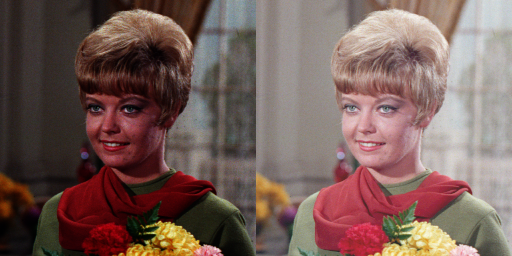

In [4]:
def adjust_gamma(image, gamma=1.0):
    # Membangun tabel lookup untuk nilai gamma yang disesuaikan
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")

    # Menerapkan gamma correction menggunakan tabel lookup
    return cv.LUT(image, table)

# create Gamma Collection according to the instructions

print('Gamma Correction pada citra')
print('---------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

img = cv.imread('/content/drive/MyDrive/imgpro_compvis/Salinan female.tiff')

gamma_corrected = adjust_gamma(img, gamma=gamma)

final_frame = cv.hconcat([img, gamma_corrected])

cv2_imshow(final_frame)

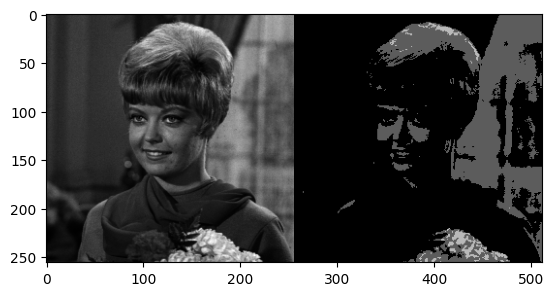

In [7]:
def bit_depther(image, levels):
    # Scale the image intensities to the new range and back
    normalized_img = np.floor(image / levels) * levels
    return np.uint8(normalized_img)

bit_depth=2
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/imgpro_compvis/Salinan female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = bit_depther(original, level)

final_frame = cv.hconcat([original, depth_image])

plt.imshow(final_frame, cmap='gray')
plt.axis('on')
plt.show()

In [8]:
cv_img = []
for img in glob.glob('/content/drive/MyDrive/imgpro_compvis/noises/*.jpg'):
 n= cv.imread(img)
 cv_img.append(n)

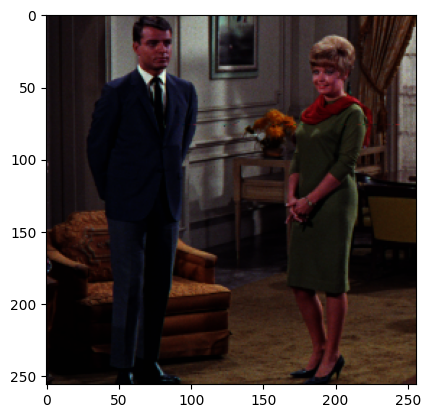

In [14]:
original = cv.cvtColor(cv.imread('/content/drive/MyDrive/imgpro_compvis/Salinan couple.tiff'), cv.COLOR_BGR2RGB)
plt.imshow(original)

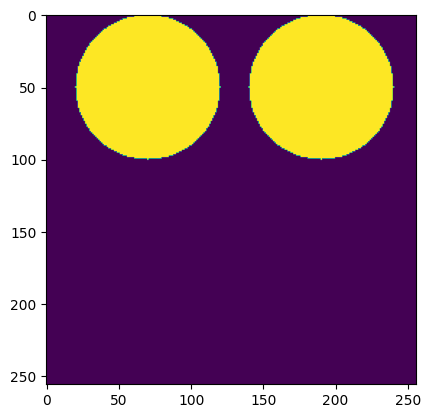

In [15]:
blank = np.zeros(original.shape[:2], dtype='uint8')
maskCirc = cv.circle(blank, (70,50), 50, 255, -1)
maskCirc = cv.circle(blank, (190,50), 50, 255, -1)
plt.imshow(maskCirc)

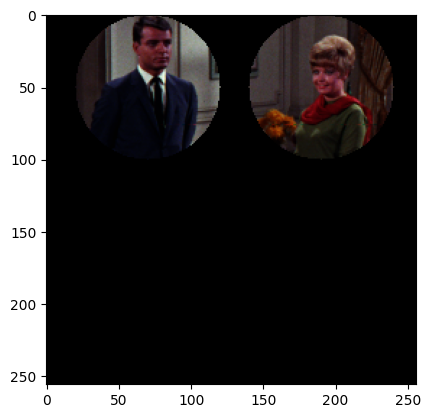

In [16]:
circAnd = cv.bitwise_and(original, original, mask=maskCirc)
plt.imshow(circAnd)

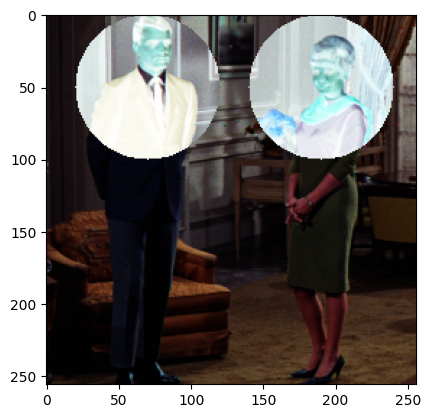

In [17]:
circNot = cv.bitwise_not(original, original, mask=maskCirc)
plt.imshow(circNot)

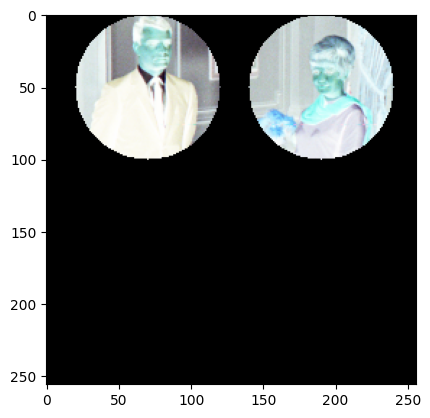

In [18]:
circOr = cv.bitwise_or(original, original, mask=maskCirc)
plt.imshow(circOr)

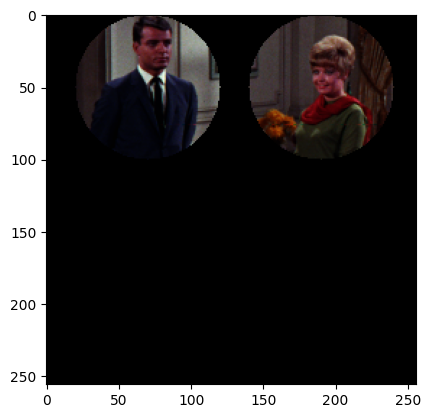

In [19]:
circNand = cv.bitwise_not(cv.bitwise_and(original, original, mask=maskCirc), cv.bitwise_and(original, original, mask=maskCirc), mask=maskCirc)
plt.imshow(circNand)

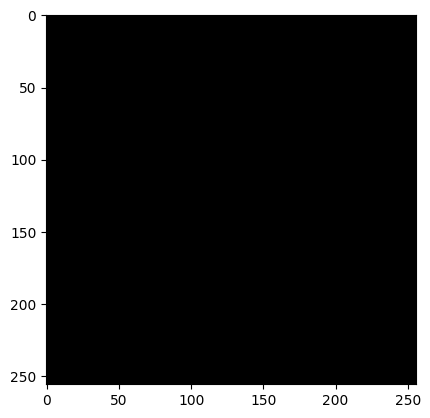

In [20]:
circXor = cv.bitwise_xor(original, original, mask=maskCirc)
plt.imshow(circXor)